# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two x variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two varaibles $x$ variables and one y variable that you want to work with that you most want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


In [699]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
import collections

#### Basic Analytic Primitives

In [1406]:
# These functions have been designed with numpy in mind. To that end they take arrays as inputs
# and provide inputs as output

def derivative(f):
    def df(x, h=0.1e-10): 
        return np.array((f(x+h)-f(x-h))/(2*h))
    return df

def partial_derivative(f, nth=0, h=0.1e-10):
    def partial(*xs):
        dxs = np.array(xs, dtype=np.float64)
        dxs[nth] = xs[nth] + h
        return np.array((f(*dxs)-f(*xs))/h)
    return partial

def gradient(f):
    def grad(*xs):
        if len(xs) == 1:
            # If you don't watch for this special case,
            # the result degerates and throws errors as
            # numpy.ndarrays continue to nest
            return np.array(derivative(f)(*xs))
        else:
            return np.array([partial_derivative(f, n)(*xs) for n in range(len(xs))])
    return grad

def jacobian(fs):
    def j(*xs):
        return np.array([gradient(f)(*xs) for f in fs])
    return j

#### Manual 3-Dimensional Gradient Descent w/ Fixed Learning Rate

In [1134]:
# Rosenbrock Function
def rosenbrock(X, Y):
    a = np.sin((0.5*(X**2)) - (0.25*(Y**2)) + 3) 
    b = np.cos((2*X) + 1 - np.exp(Y))
    return a * b

In [1135]:
# Gradient of the Rosenbrock Function
grad = gradient(rosenbrock)

In [1136]:
# Generating The Manifold
X = np.linspace(-2, 2, 100)
Y = np.linspace(-4, 0, 100)

X, Y = np.meshgrid(X, Y)
Z = rosenbrock(X, Y)

In [1137]:
# Starting Point
x = np.array([0])
y = np.array([-2])
z = rosenbrock(x, y)

In [1138]:
# Hyperparameters
learning_rate = 0.3

In [1139]:
# First iteration of gradient descent
x_1, y_1 = np.array([x, y]) - learning_rate*grad(x, y)
z_1 = rosenbrock(x_1, y_1)

In [1140]:
# Second iteration of gradient descent
x_2, y_2 = np.array([x_1, y_1]) - learning_rate*grad(x_1, y_1)
z_2 = rosenbrock(x_2, y_2)

In [1141]:
# Third iteration of gradient descent
x_3, y_3 = np.array([x_2, y_2]) - learning_rate*grad(x_2, y_2)
z_3 = rosenbrock(x_3, y_3)

In [1142]:
# Fourth iteration of gradient descent
x_4, y_4 = np.array([x_3, y_3]) - learning_rate*grad(x_3, y_3)
z_4 = rosenbrock(x_4, y_4)

In [1143]:
# Fifth iteration of gradient descent
x_5, y_5 = np.array([x_4, y_4]) - learning_rate*grad(x_4, y_4)
z_5 = rosenbrock(x_5, y_5)

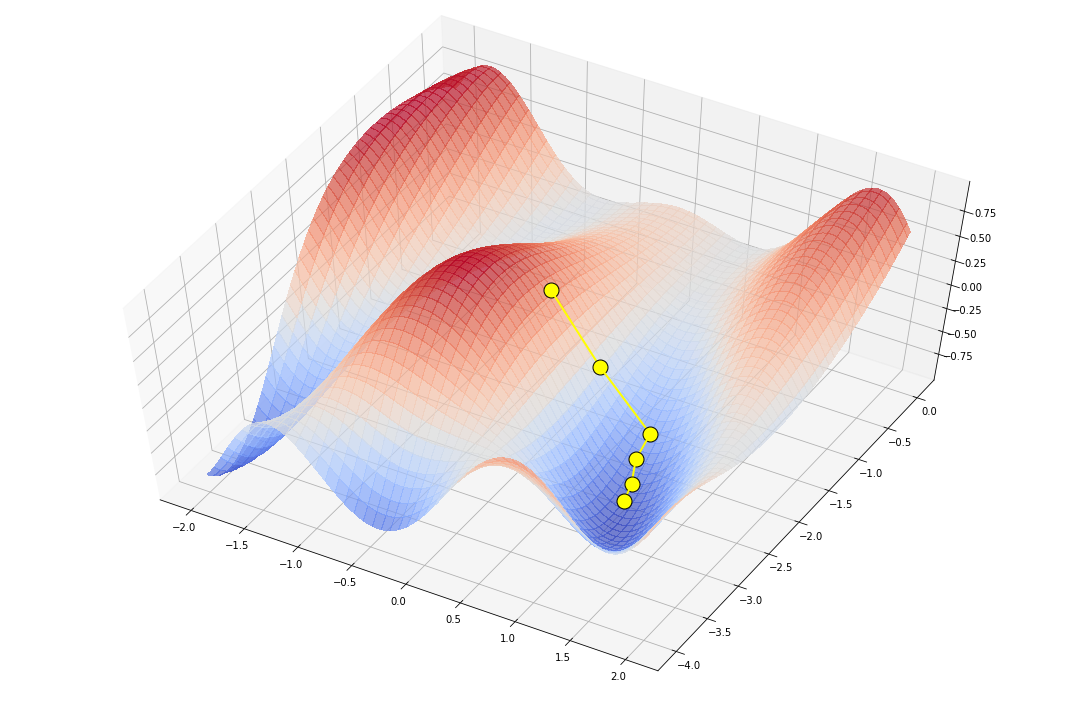

In [1144]:
# Plotting
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.7)
ax.plot(x, y, z, 'o', c='yellow', markersize=15, markeredgecolor='black', markeredgewidth=1)
ax.plot(np.concatenate([x, x_1]), np.concatenate([y, y_1]), np.concatenate([z, z_1]), linewidth=2, color='yellow')
ax.plot(x_1, y_1, z_1, 'o', c='yellow', markersize=15, markeredgecolor='black', markeredgewidth=1)
ax.plot(np.concatenate([x_1, x_2]), np.concatenate([y_1, y_2]), np.concatenate([z_1, z_2]), linewidth=2, color='yellow')
ax.plot(x_2, y_2, z_2, 'o', c='yellow', markersize=15, markeredgecolor='black', markeredgewidth=1)
ax.plot(np.concatenate([x_2, x_3]), np.concatenate([y_2, y_3]), np.concatenate([z_2, z_3]), linewidth=2, color='yellow')
ax.plot(x_3, y_3, z_3, 'o', c='yellow', markersize=15, markeredgecolor='black', markeredgewidth=1)
ax.plot(np.concatenate([x_3, x_4]), np.concatenate([y_3, y_4]), np.concatenate([z_3, z_4]), linewidth=2, color='yellow')
ax.plot(x_4, y_4, z_4, 'o', c='yellow', markersize=15, markeredgecolor='black', markeredgewidth=1)
ax.plot(np.concatenate([x_4, x_5]), np.concatenate([y_4, y_5]), np.concatenate([z_4, z_5]), linewidth=2, color='yellow')
ax.plot(x_5, y_5, z_5, 'o', c='yellow', markersize=15, markeredgecolor='black', markeredgewidth=1)

ax.view_init(60, -60)

plt.tight_layout()

#### Manual 2-Dimensional Gradient Descent w/ Fixed Learning Rate

In [1153]:
# Parabola / Gradient of the Parabola
f = lambda x: x**2
gradf = gradient(f)

In [1154]:
# Generating Points
X = np.linspace(-3, 3, 100)
Y = f(X)

In [1155]:
# Starting Point 
x = np.array([-2.5])
y = f(x)

In [1174]:
# Hyperparameters
learning_rate = 0.2

In [1175]:
# First iteration of gradient descent
x_1 = x - learning_rate*gradf(x)
y_1 = f(x_1)

In [1176]:
# Second iteration of gradient descent
x_2 = x_1 - learning_rate*gradf(x_1)
y_2 = f(x_2)

In [1177]:
# Third iteration of gradient descent
x_3 = x_2 - learning_rate*gradf(x_2)
y_3 = f(x_3)

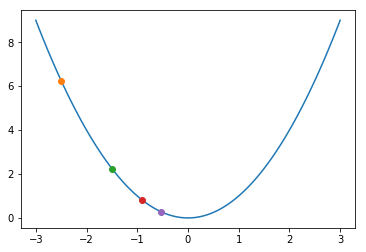

In [1178]:
# Plotting
plt.plot(X, Y)
plt.plot(x, y, marker='o')
plt.plot(x_1, y_1, marker='o')
plt.plot(x_2, y_2, marker='o')
plt.plot(x_3, y_3, marker='o')

#### N-Dimensional Gradient Descent 

In [1578]:
def gradient_descent(func, learning_rate=0.1, convergence_threshold=0.05):
    assert 0 < learning_rate, "Learning rate must be greater than 0."
    assert 0 < convergence_threshold, "Convergence threshold must be greater than zero."
    
    Mapping = collections.namedtuple("Mapping", ("inputs", "outputs"))
    
    def optimized_func(*xs):        
        steps = []
        grad = gradient(func)
        distance = float('inf')

        y = func(*xs)
        steps.append(Mapping(np.array(xs), y))
        
        while convergence_threshold < distance:            
            previous_step = steps[-1].inputs
            change = grad(*previous_step)
            
            step = previous_step - learning_rate*change
            y = func(*step)
                        
            steps.append(Mapping(step, y))

            # For the normal reasons, the higher dimensionality of the output
            # the less meaningful this measure of distance becomes
            distance = np.linalg.norm(steps[-2].outputs - steps[-1].outputs)

        return steps
    return optimized_func

#### Optimizing On A Parabola

Iterations to Converge: 27


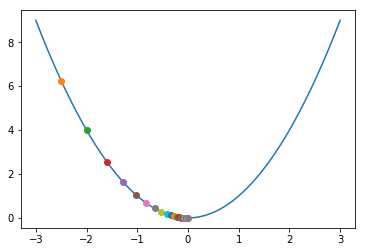

In [1412]:
f = lambda x: x**2

optimizer = gradient_descent(f, learning_rate=0.1, convergence_threshold=0.00005)

# Domain
X = np.linspace(-3, 3, 100)
Y = f(X)

# Starting Point
x = np.array([-2.5])

plt.plot(X, Y)

steps = optimizer(x)

for (x, ), y in steps:
    plt.plot(x, y, marker='o')
    
print("Iterations to Converge:", len(steps))

#### Optimizing Over A Manifold

Iterations to Convergence: 117


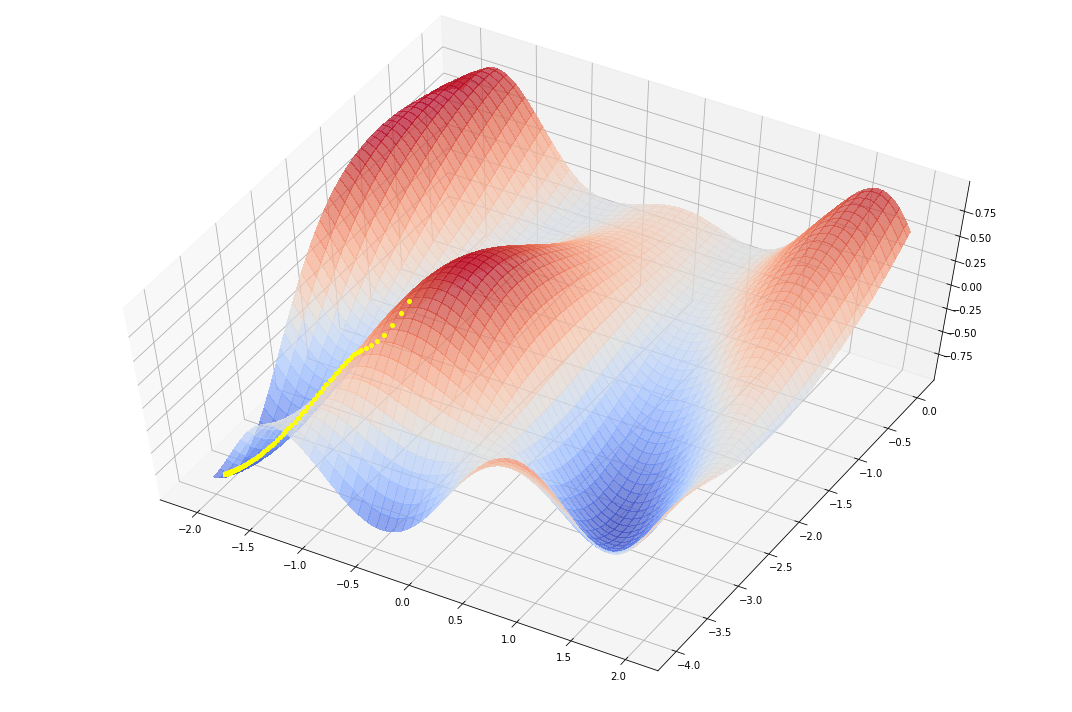

In [1413]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

optimizer = gradient_descent(rosenbrock, learning_rate=0.05, convergence_threshold=0.0000005)

# Domain
X = np.linspace(-2, 2, 100)
Y = np.linspace(-4, 0, 100)

# Rosenbrock manifold
X, Y = np.meshgrid(X, Y)
Z = rosenbrock(X, Y)

# Start Point
x = np.array([-1])
y = np.array([-2.5])

# Plot Manifold
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.7)

# Optimize Via Gradient Descent
points = optimizer(x, y)

# Plot Gradient Descent Steps
for (x, y), z in points:
    ax.plot(x, y, z, 'o', c='yellow', markersize=4)

ax.view_init(60, -60)

plt.tight_layout()

print("Iterations to Convergence:", len(points))

#### OSL Plane Of Best Fit

In [1613]:
# OLS Regressor
model = collections.namedtuple("Model", ("predict", "weights"))

def OLS(X_train, y):
    X_train = np.c_[X_train, np.ones(X_train.shape[0])]
    weights = np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), np.matmul(X_train.T, y)) 
    predict = lambda X_test: np.array(X_test).dot(weights[:weights.size-1]) + weights[-1]
    
    return model(predict, weights) 

In [1614]:
# Root Mean Square Error
def rmse(y_true, y_pred):
     return np.sqrt(((y_pred - y_true)**2).sum()/y_pred.size)

In [1615]:
# Sum of Square Errors
def sse(X, y, h):
    return ((y - h(X))**2).sum()

In [1616]:
# Blood Pressure Data
blood_pressure_url = 'https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls'
blood_pressure = pd.read_excel(blood_pressure_url)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [1617]:
# Split the daat into labels and features
X = blood_pressure[['X1', 'X2']]
y = blood_pressure['X3']

In [1618]:
# Create the OLS model
regressor = OLS(X, y)

In [1619]:
# Determine the error
rmse(y, regressor.predict(X))

3.9640813615360804

In [1620]:
# OLS-Determined weights
regressor.weights

array([ 1.34630691, -0.17273689,  3.71977573])

In [1621]:
# Extract the regression plane's polynomial terms
coeff1, coeff2, inter = regressor.weights

Text(0.5,0.92,'Blood Pressure - Plane Of Best Fit')

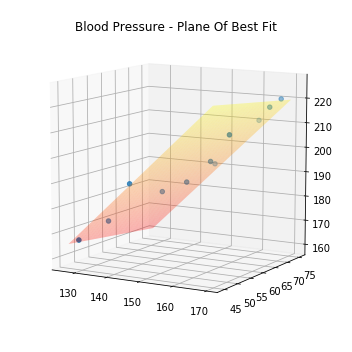

In [1622]:
# Plot the Plane of Best Fit
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')

ax.scatter(X['X1'], X['X2'], y, s=20)

V = np.linspace(*ax.get_xlim(), 100)
W = np.linspace(*ax.get_ylim(), 100)

V, W = np.meshgrid(V, W)

ax.plot_surface(V, W, (V*coeff1)+(W*coeff2)+inter, cmap=cm.autumn, alpha=0.3)

ax.view_init(10, -60)

plt.tight_layout()

plt.title("Blood Pressure - Plane Of Best Fit")

#### Optimizing A Multiple Regression Model

Text(0.5,0.92,'RMSE')

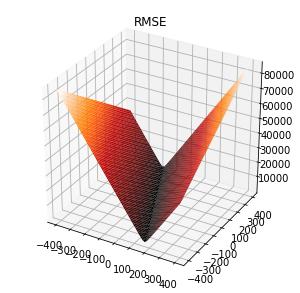

In [1676]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')

X = np.linspace(-400, 400, 50)
Y = np.linspace(-400, 400, 50)
X, Y = np.meshgrid(X, Y)
Z = np.vectorize(hypothesis)(X, Y, 3.71977573)

ax.plot_surface(X, Y, Z, cmap=cm.gist_heat)

plt.title("RMSE")

In [1624]:
# To optimize linear regression via gradient descent we 
# need to basically randomly select some weights, determine
# the error and reduce it using the gradient descent method

def hypothesis(theta1, theta2, intercept):
    y_pred = (blood_pressure['X1']*theta1) + (blood_pressure['X2']*theta2) + intercept
    return rmse(y, y_pred)

In [1788]:
optimizer = gradient_descent(hypothesis, learning_rate=1, convergence_threshold=0.01)

In [1789]:
# We can tell this is correct, or at least a local minimum, because for any arbitrary 
# convergence threshold, this optimizes _immediately_ whereas adding any amount of noise
# or starting at some random point can take forever to optimize

steps = optimizer(*regressor.weights)

In [1790]:
steps

[Mapping(inputs=array([ 1.34630691, -0.17273689,  3.71977573]), outputs=3.9640813615360804),
 Mapping(inputs=array([ 1.34644014, -0.17251485,  3.71973132]), outputs=3.9642272955967441)]

## Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers.

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring these topics
- How do they differ from the "vanilla" gradient descent we explored today
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)